In [33]:
import sys
sys.path.append('../')
import os
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import Utils.graphing_helpers
import read_data as rd
import importlib
importlib.reload(Utils.graphing_helpers)
from Utils.graphing_helpers import (plot_vicsek_phase_diagram, plot_dir_cross_vel_phase_diagram,  plot_dir_cross_vel_norm_phase_diagram, 
                                    save_fig_pdf, edges_from_centers_log, edges_from_centers_linear)
from Analysis_Calculations.local_packing_fraction import get_local_packing_fraction, get_peaks_info, get_packing_mean_and_std_dev
from Analysis_Calculations.dir_cross_vel import get_dir_cross_vel_norm
from sklearn.linear_model import LinearRegression

In [29]:
def load_statistic_data(value_key, Dr_vals, J_vals, exp_dir, use_new = True):
    statistic_values = []
    for D_r in Dr_vals:
        row_of_values = []
        for J in J_vals:
            if use_new:
                single_simulation_stats_filename = os.path.join(exp_dir, "J=%.4f_and_Dr=%.4f"%(J, D_r), 'new_single_stats.json')
            else:
                single_simulation_stats_filename = os.path.join(exp_dir, "J=%.4f_and_Dr=%.4f"%(J, D_r), 'single_stats.json')
            with open(single_simulation_stats_filename) as stats_file:
                stats = json.loads(stats_file.read())
            row_of_values.append(stats[value_key])
        statistic_values.append(row_of_values)
    statistic_values = np.array(statistic_values)
    return statistic_values

In [119]:
save_folder_base = '/home/ryanlopez/senior_thesis_images/'

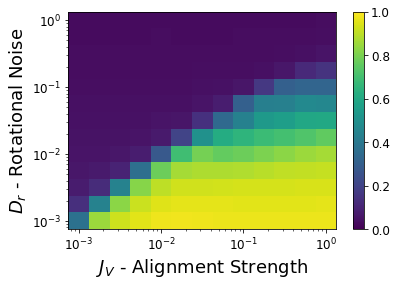

In [120]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
plt.xlabel(r'$J_V$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'vicsek_align_flocking_phase_diagram_packing_0.6.pdf'))
plt.show()

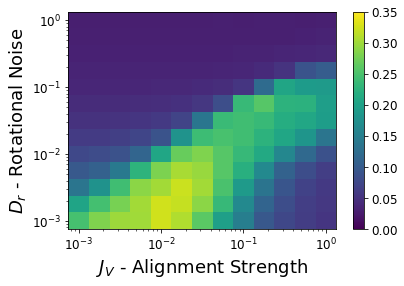

In [124]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.35)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
plt.xlabel(r'$J_V$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'vicsek_align_std_dev_phase_diagram_0.6.pdf'))
plt.show()

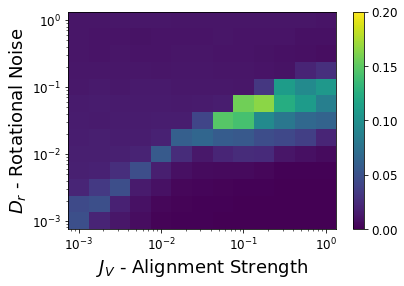

In [125]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('dir_cross_vel_norm', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=0.2)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot, ticks=[0, 0.05, 0.1, 0.15, 0.2])
cbar.ax.tick_params(labelsize=12)
cbar.ax.set_yticklabels(['0.00', '0.05', '0.10', '0.15', '0.20'])
plt.xlabel(r'$J_V$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'vicsek_align_aster_phase_diagram_packing_0.6.pdf'))
plt.show()

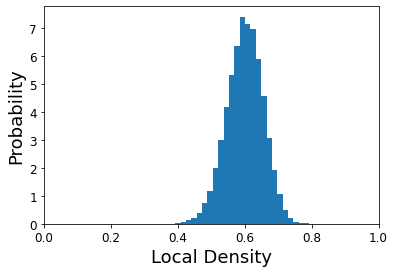

In [129]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
J = J_vals[-1]
Dr  = Dr_vals[0]
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
analysis_data_dir = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data')
with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
    local_packing_fraction = np.load(local_packing_file)
mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
bin_edges = edges_from_centers_linear(bin_centers)

fig, ax = plt.subplots()
y, _, _ = ax.hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
plt.xlabel(r'Local Density', fontsize=18)
plt.ylabel(r'Probability', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0,1)
save_fig_pdf(os.path.join(save_folder_base,'no_ps_density_hist.pdf'))
plt.show()

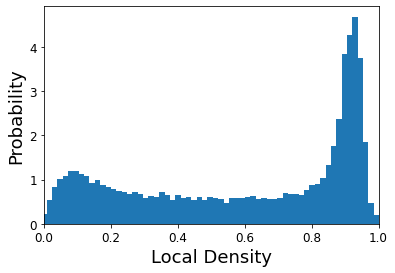

In [127]:
load_dir = "/home/ryanlopez/Polar_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
box_length = 70
num_bins_along_dim = 5
particle_area = np.pi
J_vals = np.logspace(-3, 0, num=13)
Dr_vals = np.logspace(-3, 0, num=13)
J = J_vals[4]
Dr  = Dr_vals[0]
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
analysis_data_dir = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data')
with open(os.path.join(analysis_data_dir, 'local_packing_hist.npy'), 'rb') as local_packing_file:
    local_packing_fraction = np.load(local_packing_file)
mean, std_dev, bin_centers = get_packing_mean_and_std_dev(local_packing_fraction, num_bins_along_dim, box_length, particle_area)
bin_edges = edges_from_centers_linear(bin_centers)

fig, ax = plt.subplots()
y, _, _ = ax.hist(local_packing_fraction.flatten(), bins=bin_edges, density=True)
plt.xlabel(r'Local Density', fontsize=18)
plt.ylabel(r'Probability', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1)
save_fig_pdf(os.path.join(save_folder_base,'ps_density_hist.pdf'))
plt.show()

In [132]:
load_dir = "/home/ryanlopez/Polar_Align_Saved_Data/phi=0.6000_and_v0=0.0100_big_box/J=0.1000_and_Dr=0.0100"
snapshot_dir = os.path.join(load_dir, 'snapshot_data')
run_desc_filename = os.path.join(load_dir, 'run_desc.json')
exp_data = rd.get_exp_data(snapshot_dir)
with open(run_desc_filename) as run_desc_file:
    run_desc = json.load(run_desc_file)
times = np.linspace(0, run_desc['tf'], num=run_desc['total_snapshots'])
dir_cross_vel_norm = get_dir_cross_vel_norm(exp_data)

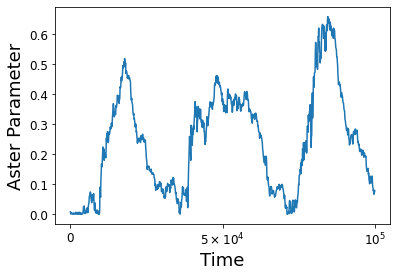

In [133]:
plt.plot(times, np.abs(dir_cross_vel_norm))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks([0, 5e4, 1e5], [r'0', r'$5 \times 10^4$', r'$10^5$'])
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Aster Parameter', fontsize = 18)
save_fig_pdf(os.path.join(save_folder_base,'dir_cross_vel_over_time.pdf'))
plt.show()

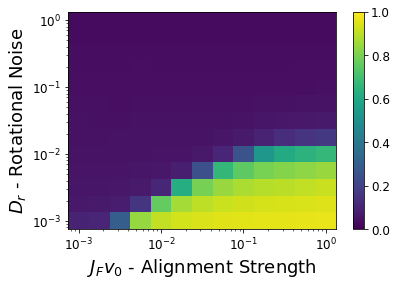

In [134]:
load_dir = "/home/ryanlopez/Velocity_Align_Big_Phase_Diagrams"
phi = 0.6
v0 = 0.03
Jv_vals = np.logspace(-3, 0, num=13)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=13)
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
plt.xlabel(r'$J_Fv_0$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'force_alignment_packing_0.6_flocking_parameter.pdf'))
plt.show()

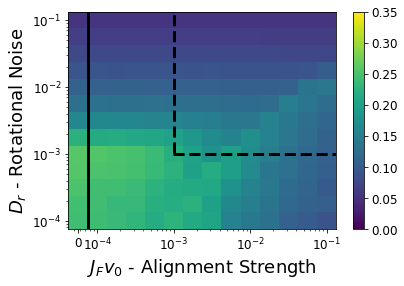

In [135]:
save_dir = "/home/ryanlopez/Velocity_Align_MIPS_Transition"
phi = 0.6
v0 = 0.1
Dr_vals = np.logspace(-4,-1,num=13)
Jv_vals = [0, *np.logspace(-4,-1,num=13)]
J_vals = [0, *(np.logspace(-4,-1,num=13)/v0)]

plt_xlabel = r'$J_Fv_0$ - Alignment Strength'
plt_ylabel = r'$D_r$ - Rotational Noise'

exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0) #Folder name of experiment directory
exp_dir = os.path.join(save_dir, exp_folder_name)

packing_std_dev_vals = load_statistic_data('packing_std_dev', Dr_vals, J_vals, exp_dir, use_new=False)
save_filename = None #os.path.join(save_dir, 'vicsek_2.pdf')

def extend_log_scale_back(values):
    log_values = np.log(values)
    diff_between_log_values = np.mean(np.diff(log_values))
    log_value_to_add = log_values[0]-diff_between_log_values
    value_to_add = np.exp(log_value_to_add)
    extended_values = [value_to_add, *values]
    return extended_values

def plot_phase_diagram_with_zero(x_values, y_values, plot_values, plt_xlabel = None, plt_ylabel = None, vmin=0, vmax=1, save_filename=None):
    if x_values[0] != 0 or y_values[0] == 0:
        raise ValueError('X axis should have zero value')
    fig, ax = plt.subplots()
    extended_x_bins = extend_log_scale_back(x_values[1:])
    x_bins = edges_from_centers_log(extended_x_bins)
    y_bins = edges_from_centers_log(y_values)
    plt.xscale('log')
    plt.yscale('log')
    xedges, yedges = np.meshgrid(x_bins,y_bins)
    plot = ax.pcolormesh(xedges, yedges, plot_values, vmin=vmin, vmax=vmax)#, edgecolors='k')
    cbar = plt.colorbar(plot)
    cbar.ax.tick_params(labelsize=12)
    plt.xlabel(plt_xlabel, fontsize=18)
    plt.ylabel(plt_ylabel, fontsize=18)
    plt.axvline(x=x_bins[1], color='black', lw=3)
    plt.axvline(x=1e-3, ymin = 0.35, color='black', linestyle='--', lw=3)
    plt.axhline(y=1e-3, xmin = 0.39, color='black', linestyle='--', lw=3)
    plt.xticks([extended_x_bins[0], x_values[1], x_values[5], x_values[9], x_values[13]], ['0', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$'])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    #fig.text(.5, -0.13, caption_line_2, ha='center', fontsize=12)
    if save_filename != None:
        save_fig_pdf(save_filename)
save_filename = os.path.join(save_folder_base,'Force_Alignment_MIPS_Transition.pdf')
plot_phase_diagram_with_zero(Jv_vals, Dr_vals, packing_std_dev_vals, plt_xlabel=plt_xlabel, plt_ylabel=plt_ylabel, vmax=0.35, save_filename = save_filename)

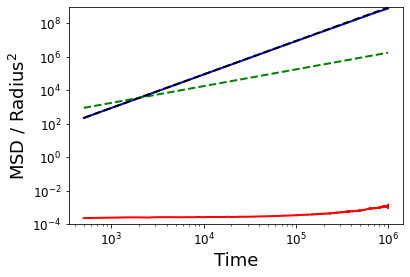

In [136]:
times = np.linspace(0, 1e6, num=2000)[1:]
load_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
J = J_vals[-1]
Dr = Dr_vals[0]
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)

msd_normal_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal.npy')
msd_minus_flock_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal_minus_avg.npy')
with open(msd_normal_filename, 'rb') as msd_normal_file:
    msd_normal = np.load(msd_normal_file)
with open(msd_minus_flock_filename, 'rb') as msd_minus_flock_file:
    msd_minus_flock = np.load(msd_minus_flock_file)

#Make plot
fig, ax = plt.subplots()
ax.plot(times, msd_normal, color='blue', label='MSD', linewidth=2)
ax.plot(times, msd_minus_flock, color='red', label='MSD Minus Flock', linewidth=2)
#Plot slope 1 line
slope_1_line = 2*(v0**2 / Dr)*times
ax.plot(times, slope_1_line, color='green', linestyle='--', label='Diffusive', linewidth=2)
#plot slope 2
slope_2_line = v0**2 * times**2
ax.plot(times, slope_2_line, color='black', linestyle='--', label='Ballistic', linewidth=2)
ax.set_ylim(1e-4, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Time', fontsize=18)
plt.ylabel(r'MSD / Radius$^2$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'high_density_solid_msd.pdf'))
plt.show()

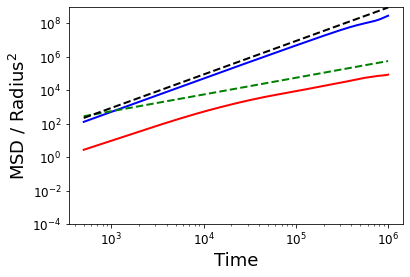

In [137]:
times = np.linspace(0, 1e6, num=2000)[1:]
load_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
J = J_vals[1]
Dr = Dr_vals[1]
run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)

msd_normal_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal.npy')
msd_minus_flock_filename = os.path.join(load_dir, exp_folder_name, run_folder_name, 'analysis_data', 'msd_normal_minus_avg.npy')
with open(msd_normal_filename, 'rb') as msd_normal_file:
    msd_normal = np.load(msd_normal_file)
with open(msd_minus_flock_filename, 'rb') as msd_minus_flock_file:
    msd_minus_flock = np.load(msd_minus_flock_file)

#Make plot
fig, ax = plt.subplots()
ax.plot(times, msd_normal, color='blue', label='MSD', linewidth=2)
ax.plot(times, msd_minus_flock, color='red', label='MSD Minus Flock', linewidth=2)
#Plot slope 1 line
slope_1_line = 2*(v0**2 / Dr)*times
ax.plot(times, slope_1_line, color='green', linestyle='--', label='Diffusive', linewidth=2)
#Plot slope 2 line
slope_2_line = v0**2 * times**2
ax.plot(times, slope_2_line, color='black', linestyle='--', label='Ballistic', linewidth=2)
ax.set_ylim(1e-4, 1e9)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'Time', fontsize=18)
plt.ylabel(r'MSD / Radius$^2$', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'high_density_liquid_msd.pdf'))
plt.show()

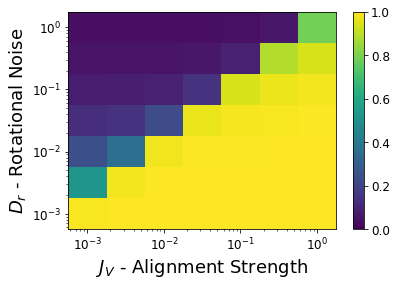

In [138]:
load_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
plt.xlabel(r'$J_V$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'high_density_vicsek_phi=1_flocking.pdf'))
plt.show()

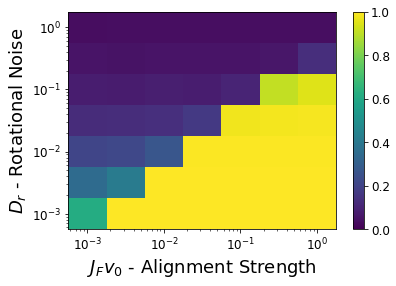

In [139]:
load_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"
phi = 1.0
v0 = 0.03
Jv_vals = np.logspace(-3, 0, num=7)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
exp_dir = os.path.join(load_dir, exp_folder_name)
vicsek_vals = load_statistic_data('velocity_vicsek_param', Dr_vals, J_vals, exp_dir)

#Make plot
fig, ax = plt.subplots()
plot = ax.pcolormesh(xedges, yedges, vicsek_vals, vmin=0, vmax=1)
plt.xscale('log')
plt.yscale('log')
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)

plt.xlabel(r'$J_Fv_0$ - Alignment Strength', fontsize=18)
plt.ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
save_fig_pdf(os.path.join(save_folder_base,'high_density_force_phi=1_flocking.pdf'))
plt.show()

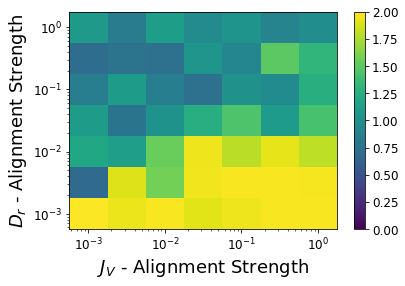

In [141]:
# Make pcolor plots
times = np.linspace(0, 1e6, num=2000)[1:]
save_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"

phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
msd_type = 'normal'
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)

fig, ax = plt.subplots()

#Load / Calculate Data
statistic_values = []
for Dr in Dr_vals:
    row_of_values = []
    for J in J_vals:
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
        if msd_type == 'normal':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal.npy')
        elif msd_type == 'normal_minus_avg':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal_minus_avg.npy')
        with open(msd_normal_filename, 'rb') as msd_normal_file:
            msd_normal = np.load(msd_normal_file)
        linear_model = LinearRegression().fit(np.log(times)[:,None], np.log(msd_normal)[:,None], sample_weight = np.arange(len(times), 0, -1)**2)
        row_of_values.append(linear_model.coef_.item())
    statistic_values.append(row_of_values)
statistic_values = np.array(statistic_values)  
#Make Plot
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$J_V$ - Alignment Strength', fontsize=18)
ax.set_ylabel(r'$D_r$ - Alignment Strength', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plot = ax.pcolormesh(xedges, yedges, statistic_values, vmin=0, vmax=2)
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
save_fig_pdf(os.path.join(save_folder_base, 'vicsek_align_msd_slopes.pdf'))
plt.show()

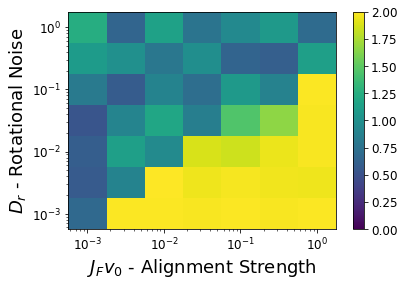

In [142]:
# Make pcolor plots
times = np.linspace(0, 1e6, num=1000)[1:]
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"

phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
msd_type = 'normal'
Jv_vals = np.logspace(-3, 0, num=7)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)

fig, ax = plt.subplots()

#Load / Calculate Data
statistic_values = []
for Dr in Dr_vals:
    row_of_values = []
    for J in J_vals:
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
        if msd_type == 'normal':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal.npy')
        elif msd_type == 'normal_minus_avg':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal_minus_avg.npy')
        with open(msd_normal_filename, 'rb') as msd_normal_file:
            msd_normal = np.load(msd_normal_file)
        linear_model = LinearRegression().fit(np.log(times)[:,None], np.log(msd_normal)[:,None], sample_weight = np.arange(len(times), 0, -1)**2)
        row_of_values.append(linear_model.coef_.item())
    statistic_values.append(row_of_values)
statistic_values = np.array(statistic_values)  
#Make Plot
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel(r'$J_Fv_0$ - Alignment Strength', fontsize=18)
ax.set_ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plot = ax.pcolormesh(xedges, yedges, statistic_values, vmin=0, vmax=2)
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
save_fig_pdf(os.path.join(save_folder_base, 'force_align_msd_slopes.pdf'))
plt.show()

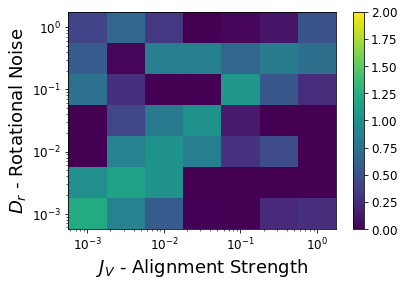

In [143]:
# Make pcolor plots
times = np.linspace(0, 1e6, num=2000)[1:]
save_dir = "/home/ryanlopez/Polar_Align_Vary_Phi_V_Saved_Data2"

phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
msd_type = 'normal_minus_avg'
J_vals = np.logspace(-3, 0, num=7)
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(J_vals)
yedges = edges_from_centers_log(Dr_vals)

fig, ax = plt.subplots()

#Load / Calculate Data
statistic_values = []
for Dr in Dr_vals:
    row_of_values = []
    for J in J_vals:
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
        if msd_type == 'normal':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal.npy')
        elif msd_type == 'normal_minus_avg':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal_minus_avg.npy')
        with open(msd_normal_filename, 'rb') as msd_normal_file:
            msd_normal = np.load(msd_normal_file)
        linear_model = LinearRegression().fit(np.log(times)[:,None], np.log(msd_normal)[:,None], sample_weight = np.arange(len(times), 0, -1)**2)
        row_of_values.append(linear_model.coef_.item())
    statistic_values.append(row_of_values)
statistic_values = np.array(statistic_values)  
#Make Plot
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel(r'$J_V$ - Alignment Strength', fontsize=18)
ax.set_ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plot = ax.pcolormesh(xedges, yedges, statistic_values, vmin=0, vmax=2)
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
save_fig_pdf(os.path.join(save_folder_base, 'vicsek_align_msd_minus_avg_slopes.pdf'))
plt.show()

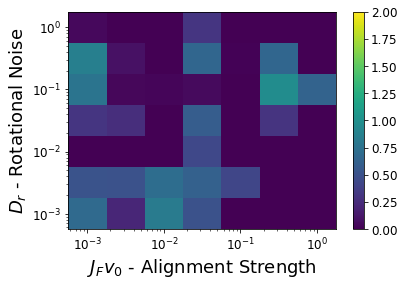

In [144]:
# Make pcolor plots
times = np.linspace(0, 1e6, num=1000)[1:]
save_dir = "/home/ryanlopez/Velocity_Align_Vary_Phi_V_Saved_Data2"

phi = 1.0
v0 = 0.03
exp_folder_name = "phi=%.4f_and_v0=%.4f"%(phi, v0)
msd_type = 'normal_minus_avg'
Jv_vals = np.logspace(-3, 0, num=7)
J_vals = Jv_vals / v0
Dr_vals = np.logspace(-3, 0, num=7)
xedges = edges_from_centers_log(Jv_vals)
yedges = edges_from_centers_log(Dr_vals)

fig, ax = plt.subplots()

#Load / Calculate Data
statistic_values = []
for Dr in Dr_vals:
    row_of_values = []
    for J in J_vals:
        run_folder_name = "J=%.4f_and_Dr=%.4f"%(J, Dr)
        analysis_data_dir = os.path.join(save_dir, exp_folder_name, run_folder_name, 'analysis_data')
        if msd_type == 'normal':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal.npy')
        elif msd_type == 'normal_minus_avg':
            msd_normal_filename = os.path.join(analysis_data_dir, 'msd_normal_minus_avg.npy')
        with open(msd_normal_filename, 'rb') as msd_normal_file:
            msd_normal = np.load(msd_normal_file)
        linear_model = LinearRegression().fit(np.log(times)[:,None], np.log(msd_normal)[:,None], sample_weight = np.arange(len(times), 0, -1)**2)
        row_of_values.append(linear_model.coef_.item())
    statistic_values.append(row_of_values)
statistic_values = np.array(statistic_values)  
#Make Plot
ax.set_xscale('log')
ax.set_yscale('log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel(r'$J_Fv_0$ - Alignment Strength', fontsize=18)
ax.set_ylabel(r'$D_r$ - Rotational Noise', fontsize=18)
plot = ax.pcolormesh(xedges, yedges, statistic_values, vmin=0, vmax=2)
cbar = plt.colorbar(plot)
cbar.ax.tick_params(labelsize=12)
save_fig_pdf(os.path.join(save_folder_base, 'force_align_msd_minus_avg_slopes.pdf'))
plt.show()